In [2]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tut18_data = pl.read_csv('TUT18_train_panns_eventsInference.csv')

In [4]:
tut18_data

files,labels,panns_inference_events_list
str,str,str
"""audio/airport-…","""airport""","""['Speech', 'Cl…"
"""audio/airport-…","""airport""","""['Speech', 'Ru…"
"""audio/airport-…","""airport""","""['Speech', 'Ru…"
"""audio/airport-…","""airport""","""['Speech', 'Cl…"
"""audio/airport-…","""airport""","""['Speech', 'An…"
…,…,…
"""audio/tram-vie…","""tram""","""['Speech', 'Ve…"
"""audio/tram-vie…","""tram""","""['Speech', 'Si…"
"""audio/tram-vie…","""tram""","""['Speech', 'Ve…"


In [5]:
from ast import literal_eval

def safe_literal_eval(s):
    try:
        return literal_eval(s)
    except ValueError:
        return s

In [25]:
def plot_event_counts(event_counts, scene_label):
    # Increase the figure height if there are many events
    num_events = len(event_counts['events_label_list'])
    fig_height = max(10, num_events * 0.3)  # Adjust the 0.3 as needed to reduce or increase spacing
    
    plt.figure(figsize=(10, fig_height))
    bars = plt.barh(range(num_events), event_counts['count'], color='skyblue', height=0.5)  # Adjust the bar height if needed
    
    plt.yticks(range(num_events), event_counts['events_label_list'], fontsize=8)
    plt.xlabel('Number of Occurrences')
    plt.title(f'Frequency of Events at {scene_label}')
    
    for bar in bars:
        plt.text(
            bar.get_width(),
            bar.get_y() + bar.get_height() / 2,
            f'{bar.get_width():.0f}',
            va='center', ha='left'
        )
    
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_50350/3466564818.py:3: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  corrected_event_col = data.select(pl.col('panns_inference_events_list').apply(safe_literal_eval).alias("events_label_list"))
/tmp/ipykernel_50350/3466564818.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  corrected_event_col = data.select(pl.col('panns_inference_events_list').apply(safe_literal_eval).alias("events_label_list"))
/tmp/ipykernel_50350/3466564818.py:6: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby("events_label_list")
/tmp/ipykernel_50350/3466564818.py:7: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias('count'))


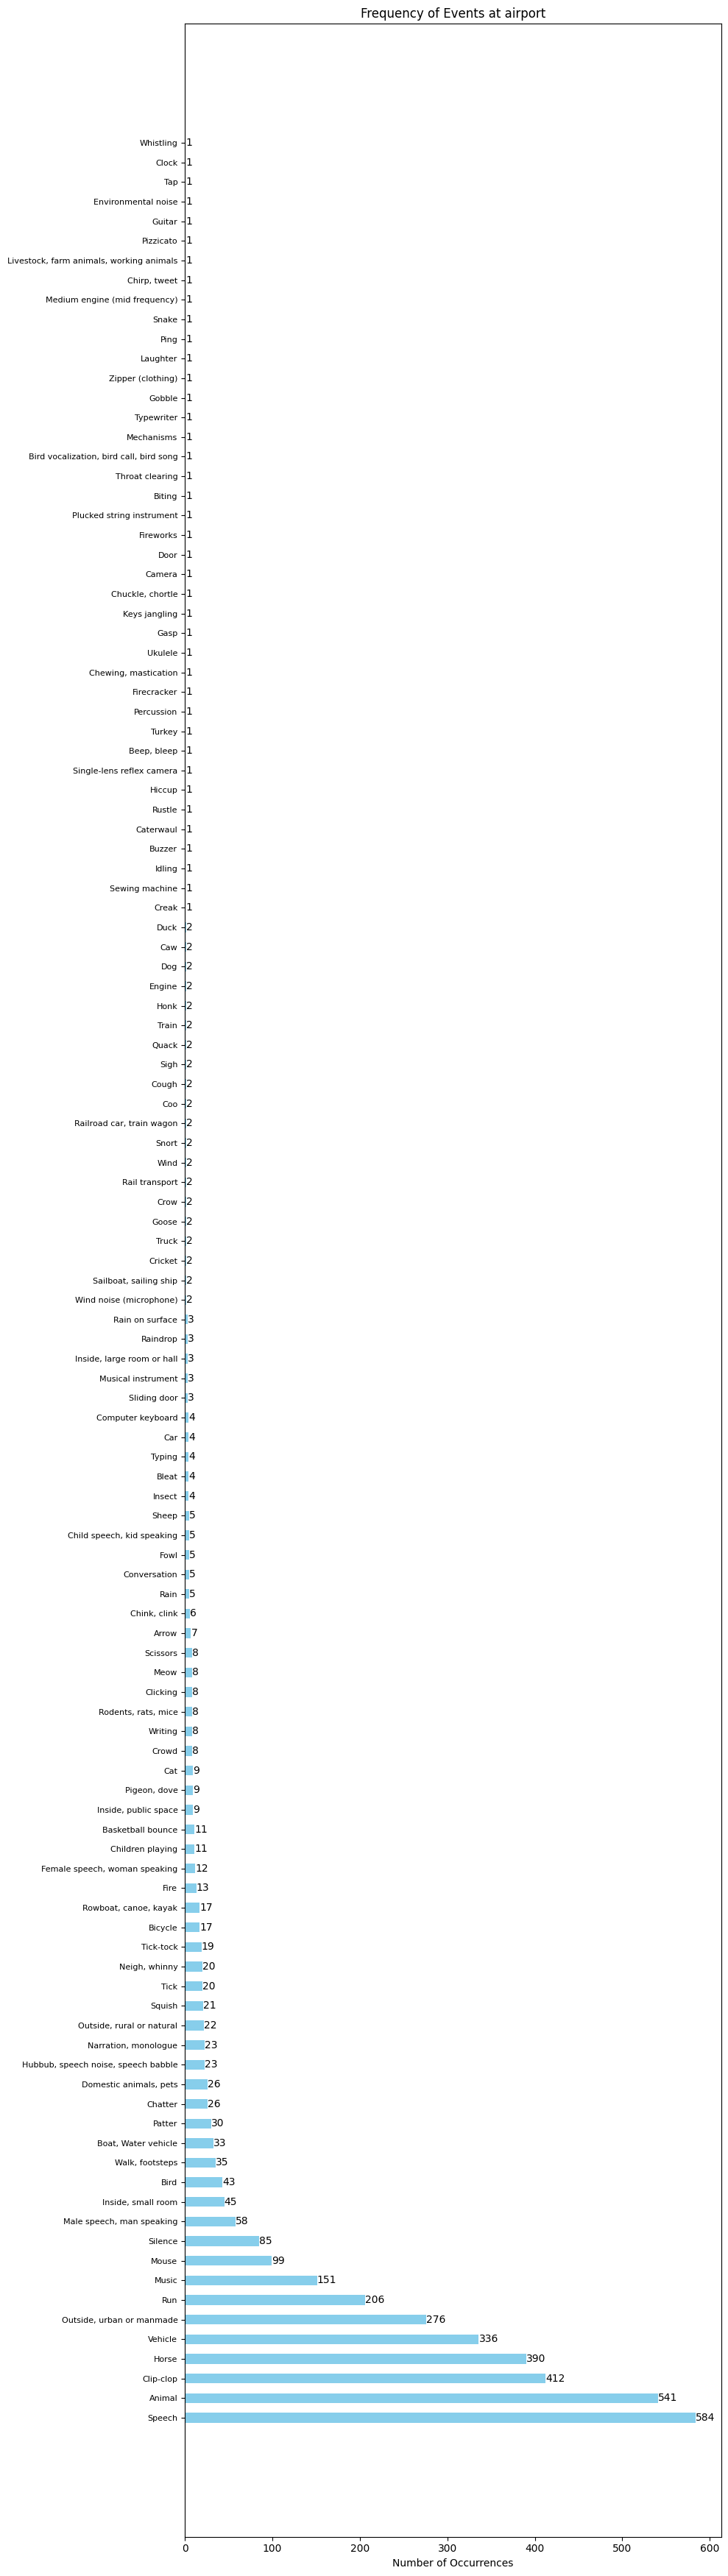

/tmp/ipykernel_50350/3466564818.py:3: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  corrected_event_col = data.select(pl.col('panns_inference_events_list').apply(safe_literal_eval).alias("events_label_list"))
/tmp/ipykernel_50350/3466564818.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  corrected_event_col = data.select(pl.col('panns_inference_events_list').apply(safe_literal_eval).alias("events_label_list"))
/tmp/ipykernel_50350/3466564818.py:6: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby("events_label_list")
/tmp/ipykernel_50350/3466564818.py:7: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias('count'))


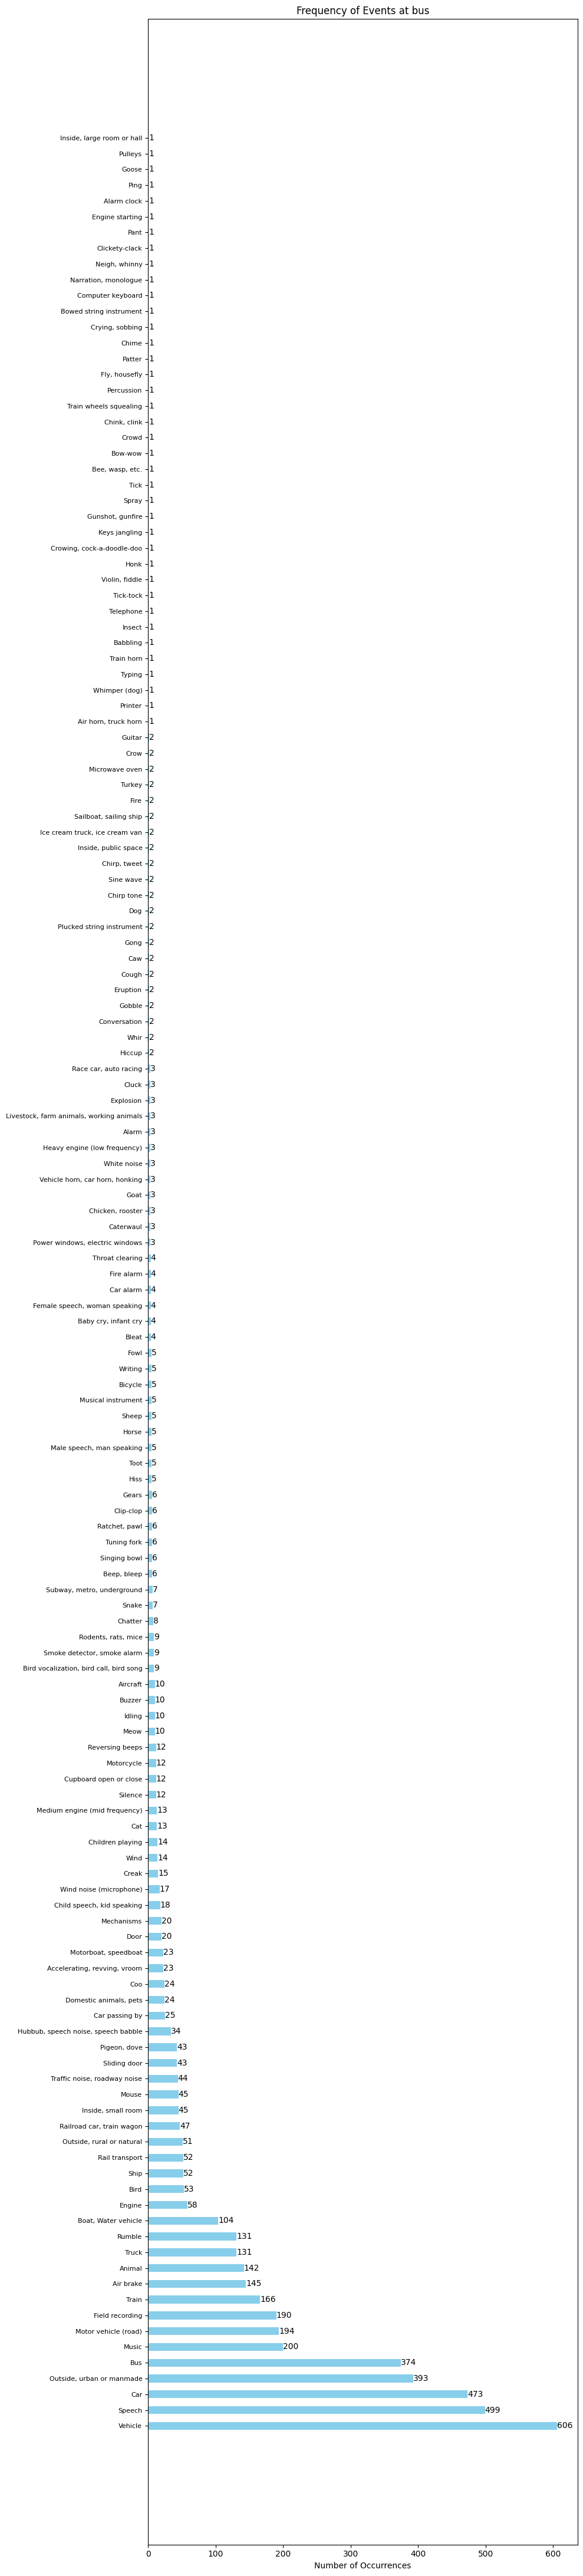

/tmp/ipykernel_50350/3466564818.py:3: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  corrected_event_col = data.select(pl.col('panns_inference_events_list').apply(safe_literal_eval).alias("events_label_list"))
/tmp/ipykernel_50350/3466564818.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  corrected_event_col = data.select(pl.col('panns_inference_events_list').apply(safe_literal_eval).alias("events_label_list"))
/tmp/ipykernel_50350/3466564818.py:6: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby("events_label_list")
/tmp/ipykernel_50350/3466564818.py:7: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias('count'))


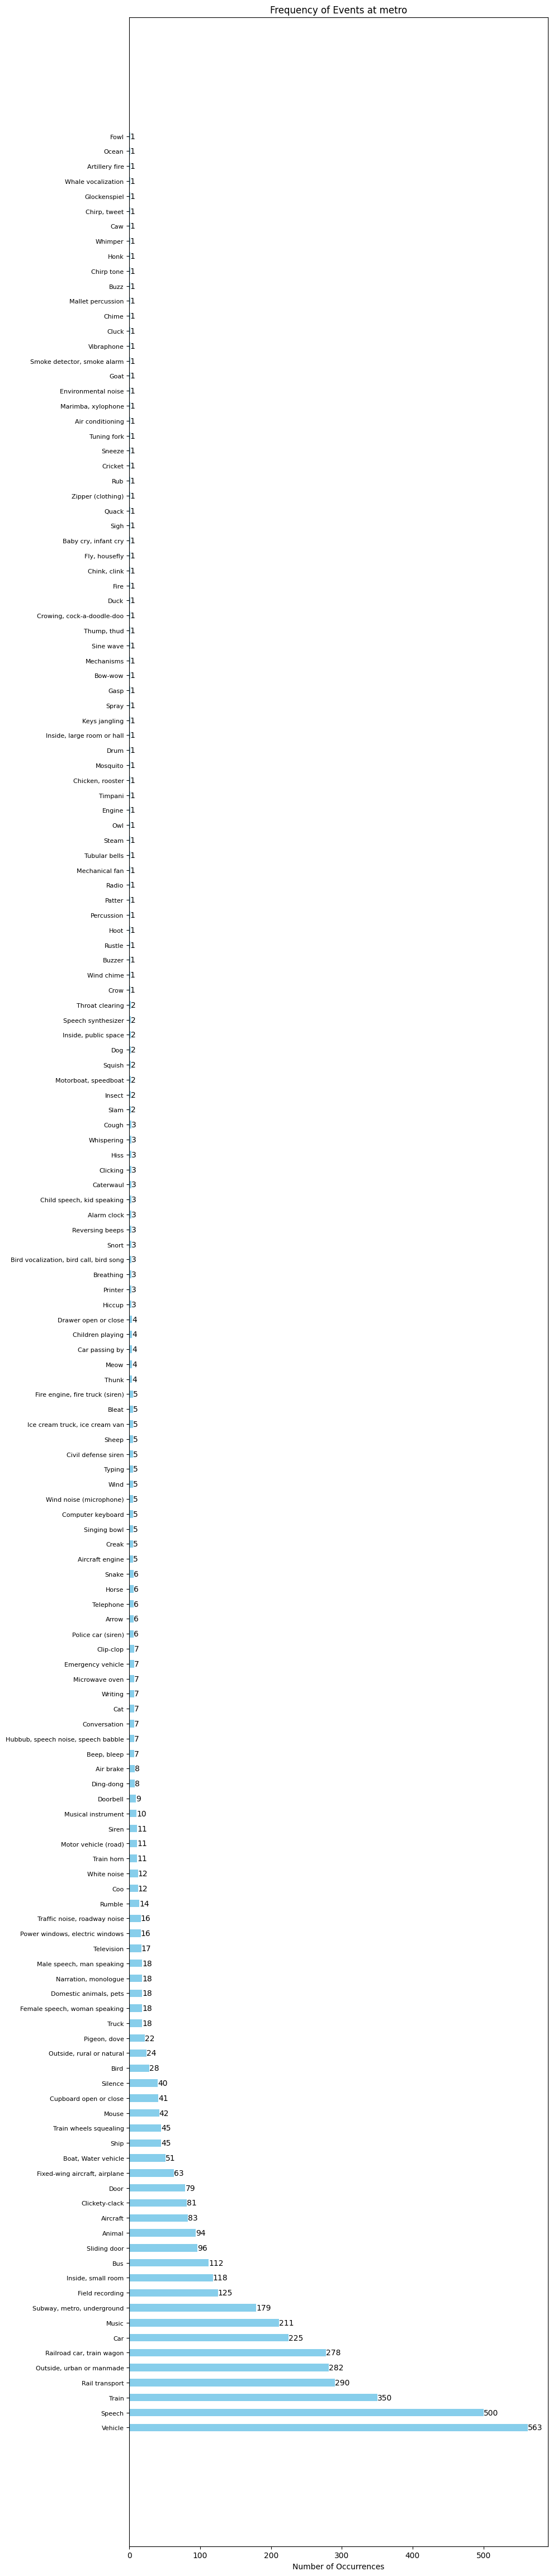

/tmp/ipykernel_50350/3466564818.py:3: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  corrected_event_col = data.select(pl.col('panns_inference_events_list').apply(safe_literal_eval).alias("events_label_list"))
/tmp/ipykernel_50350/3466564818.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  corrected_event_col = data.select(pl.col('panns_inference_events_list').apply(safe_literal_eval).alias("events_label_list"))
/tmp/ipykernel_50350/3466564818.py:6: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby("events_label_list")
/tmp/ipykernel_50350/3466564818.py:7: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias('count'))


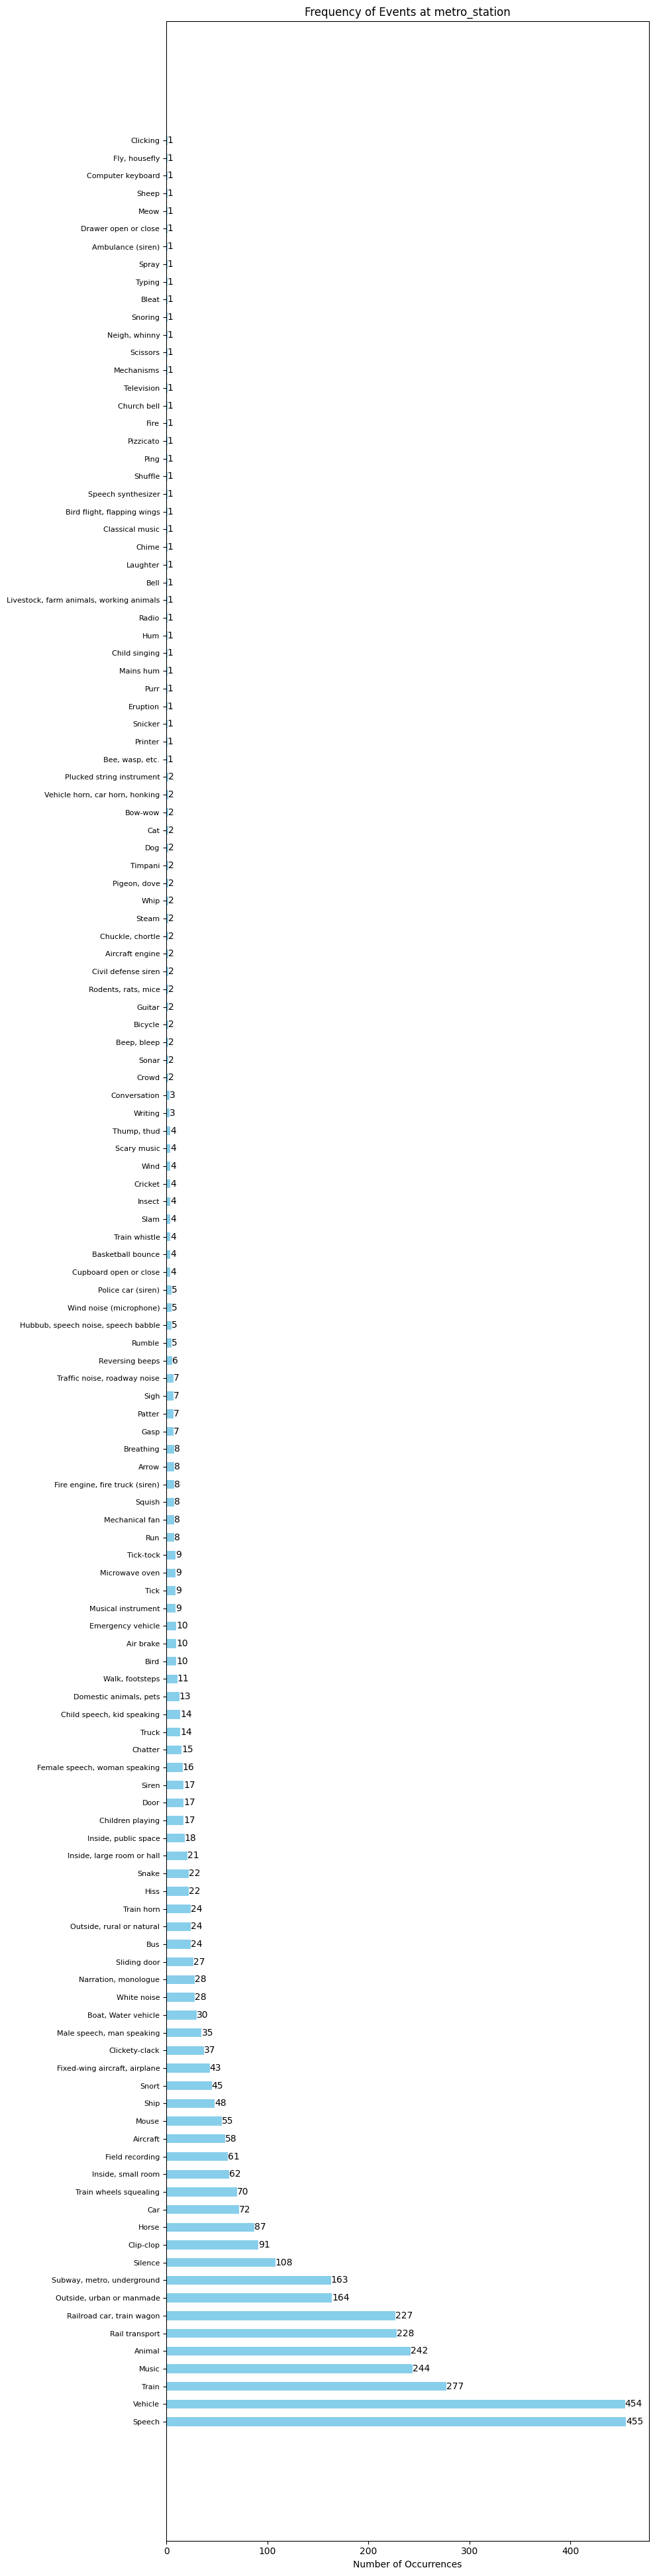

/tmp/ipykernel_50350/3466564818.py:3: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  corrected_event_col = data.select(pl.col('panns_inference_events_list').apply(safe_literal_eval).alias("events_label_list"))
/tmp/ipykernel_50350/3466564818.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  corrected_event_col = data.select(pl.col('panns_inference_events_list').apply(safe_literal_eval).alias("events_label_list"))
/tmp/ipykernel_50350/3466564818.py:6: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby("events_label_list")
/tmp/ipykernel_50350/3466564818.py:7: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias('count'))


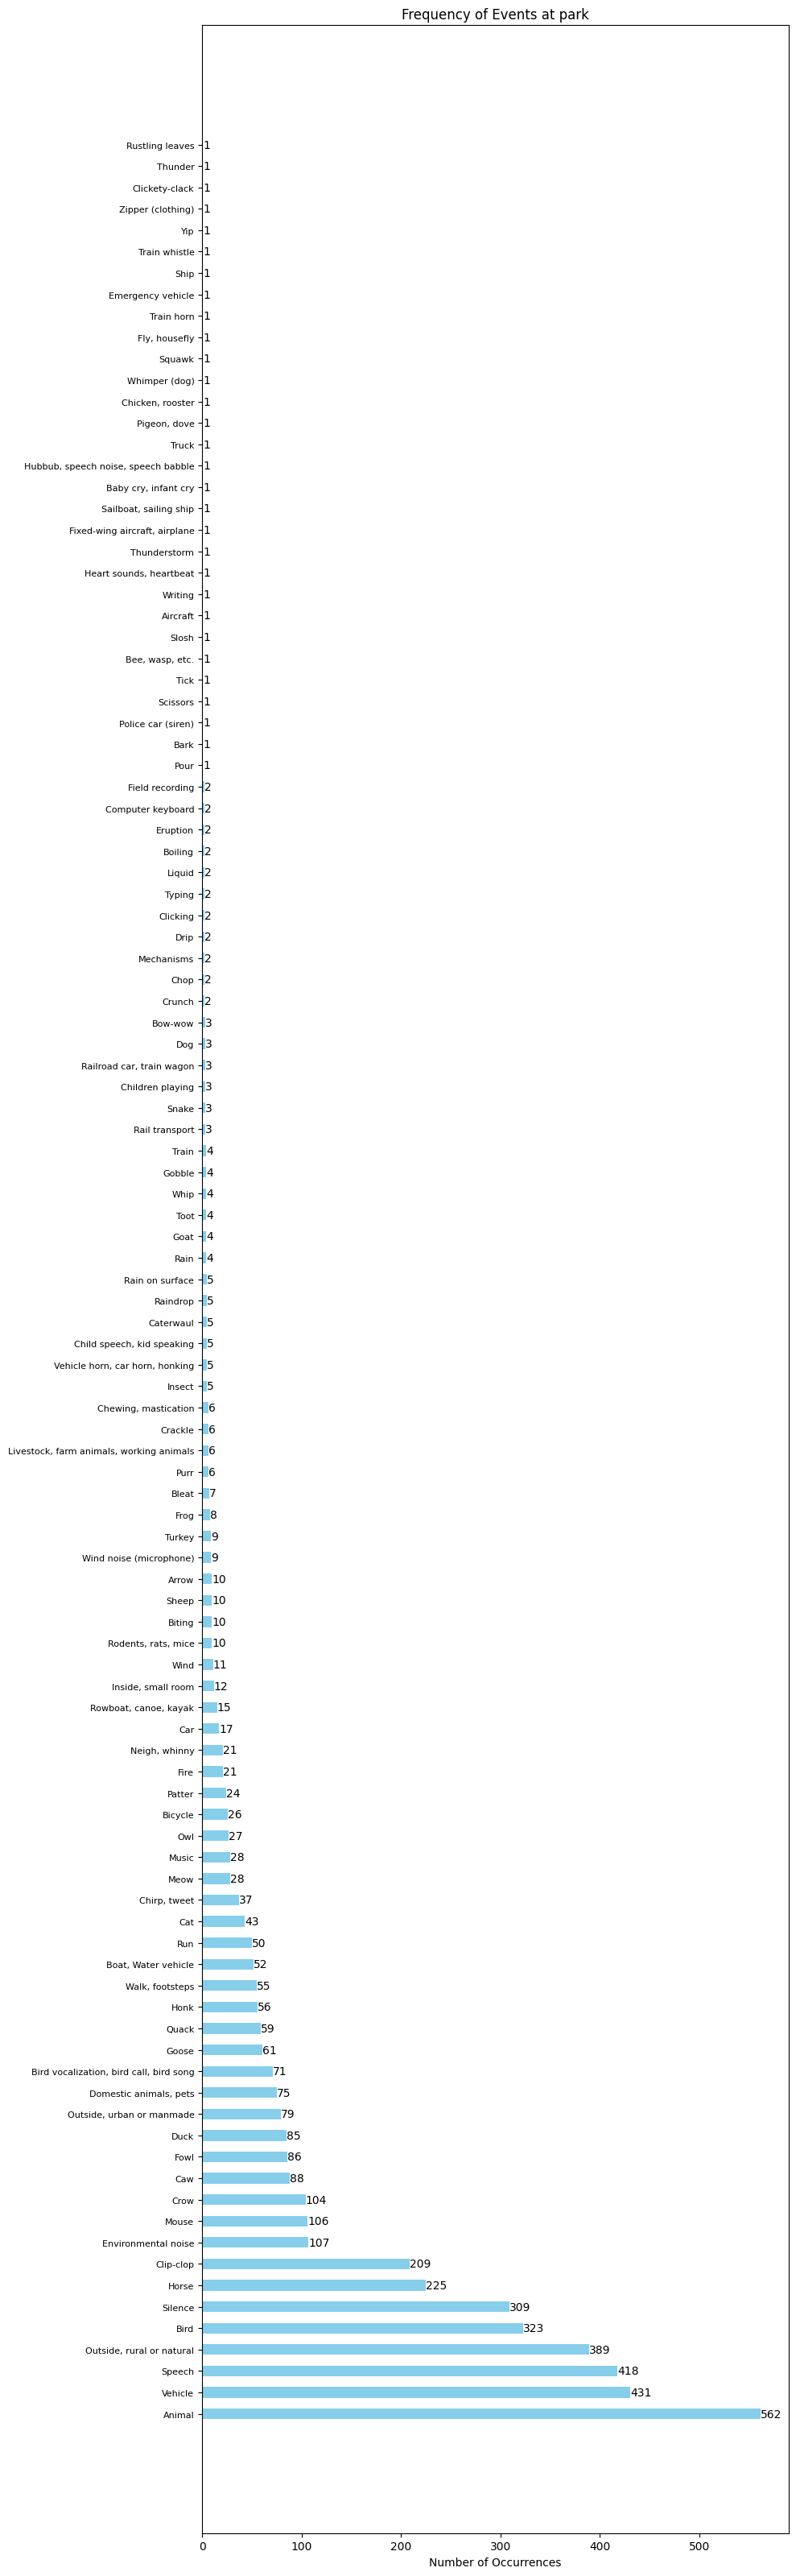

/tmp/ipykernel_50350/3466564818.py:3: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  corrected_event_col = data.select(pl.col('panns_inference_events_list').apply(safe_literal_eval).alias("events_label_list"))
/tmp/ipykernel_50350/3466564818.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  corrected_event_col = data.select(pl.col('panns_inference_events_list').apply(safe_literal_eval).alias("events_label_list"))
/tmp/ipykernel_50350/3466564818.py:6: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby("events_label_list")
/tmp/ipykernel_50350/3466564818.py:7: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias('count'))


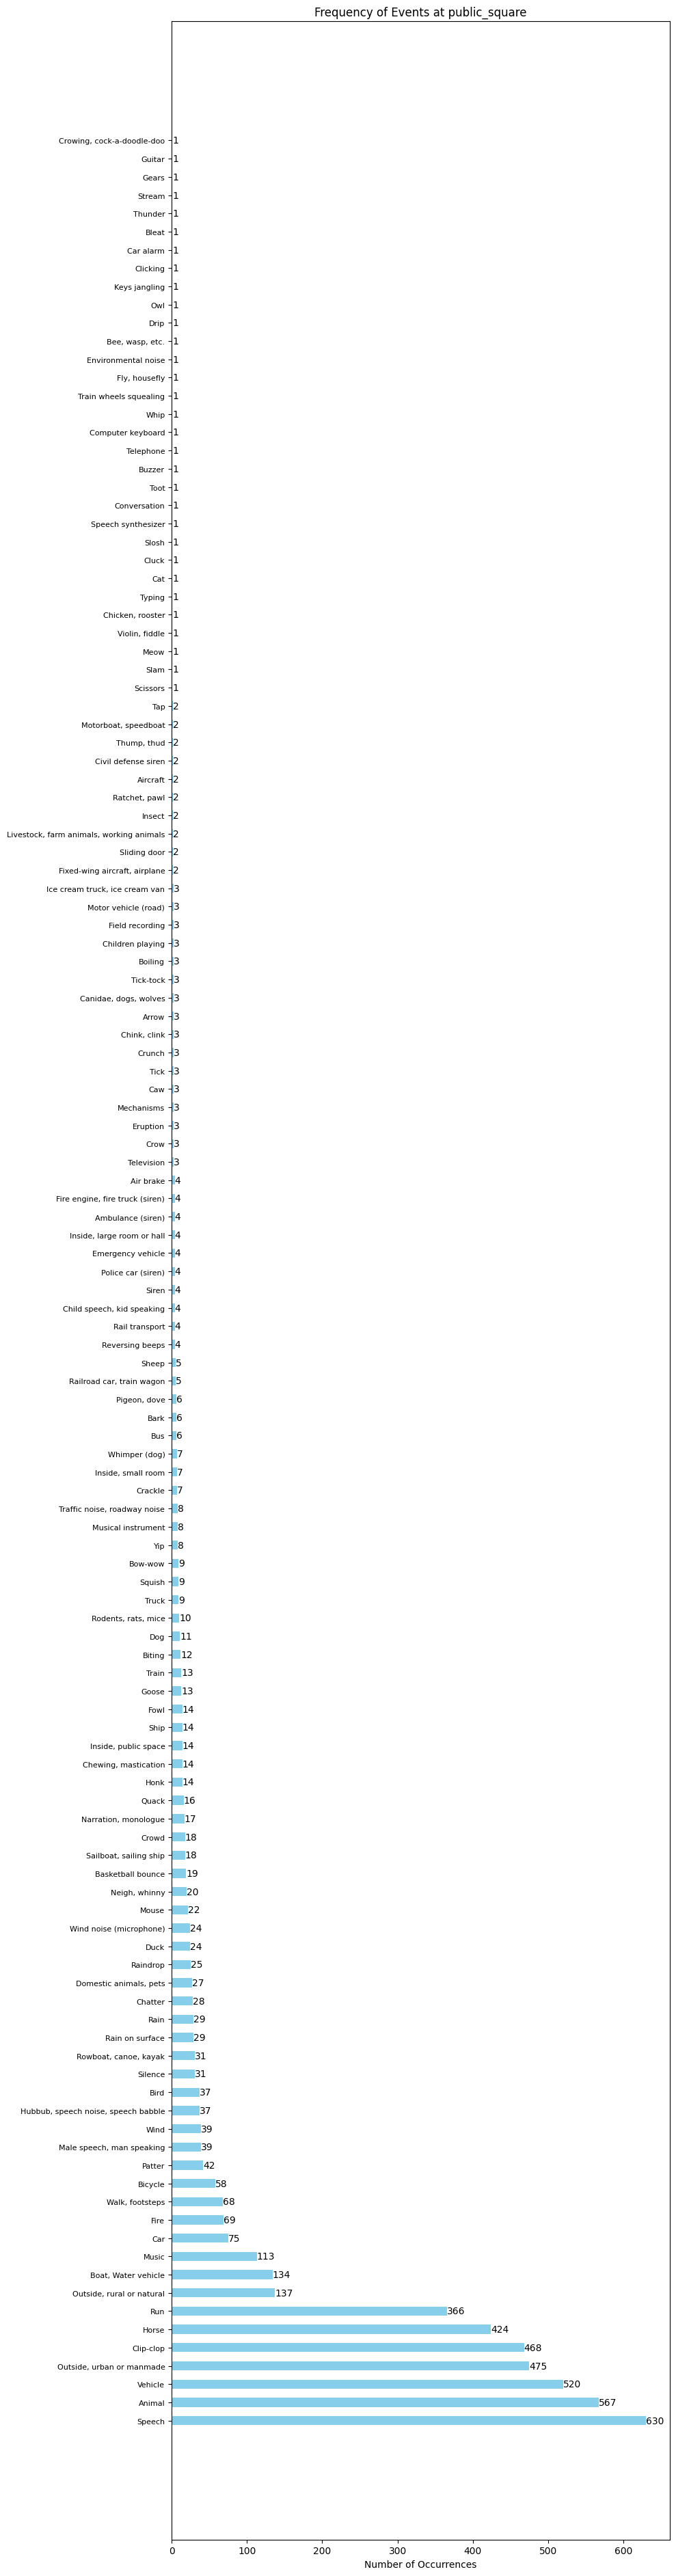

/tmp/ipykernel_50350/3466564818.py:3: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  corrected_event_col = data.select(pl.col('panns_inference_events_list').apply(safe_literal_eval).alias("events_label_list"))
/tmp/ipykernel_50350/3466564818.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  corrected_event_col = data.select(pl.col('panns_inference_events_list').apply(safe_literal_eval).alias("events_label_list"))
/tmp/ipykernel_50350/3466564818.py:6: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby("events_label_list")
/tmp/ipykernel_50350/3466564818.py:7: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias('count'))


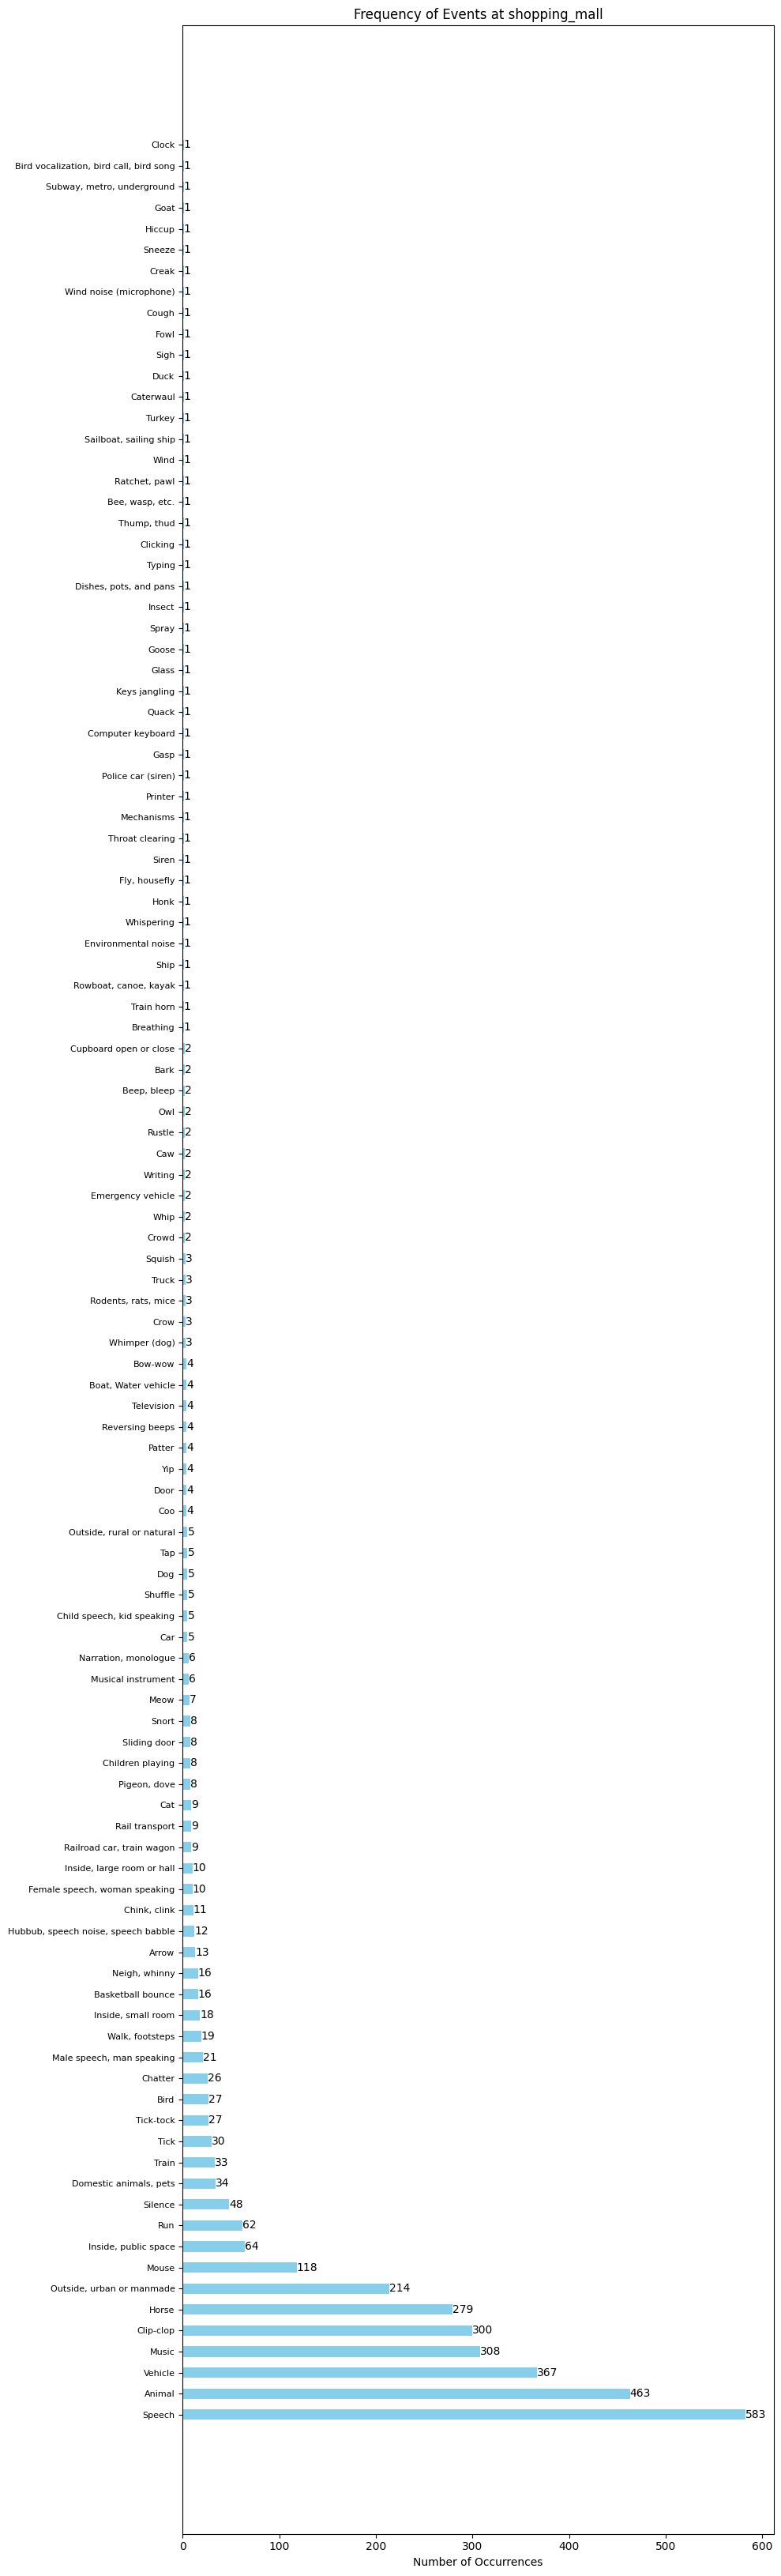

/tmp/ipykernel_50350/3466564818.py:3: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  corrected_event_col = data.select(pl.col('panns_inference_events_list').apply(safe_literal_eval).alias("events_label_list"))
/tmp/ipykernel_50350/3466564818.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  corrected_event_col = data.select(pl.col('panns_inference_events_list').apply(safe_literal_eval).alias("events_label_list"))
/tmp/ipykernel_50350/3466564818.py:6: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby("events_label_list")
/tmp/ipykernel_50350/3466564818.py:7: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias('count'))


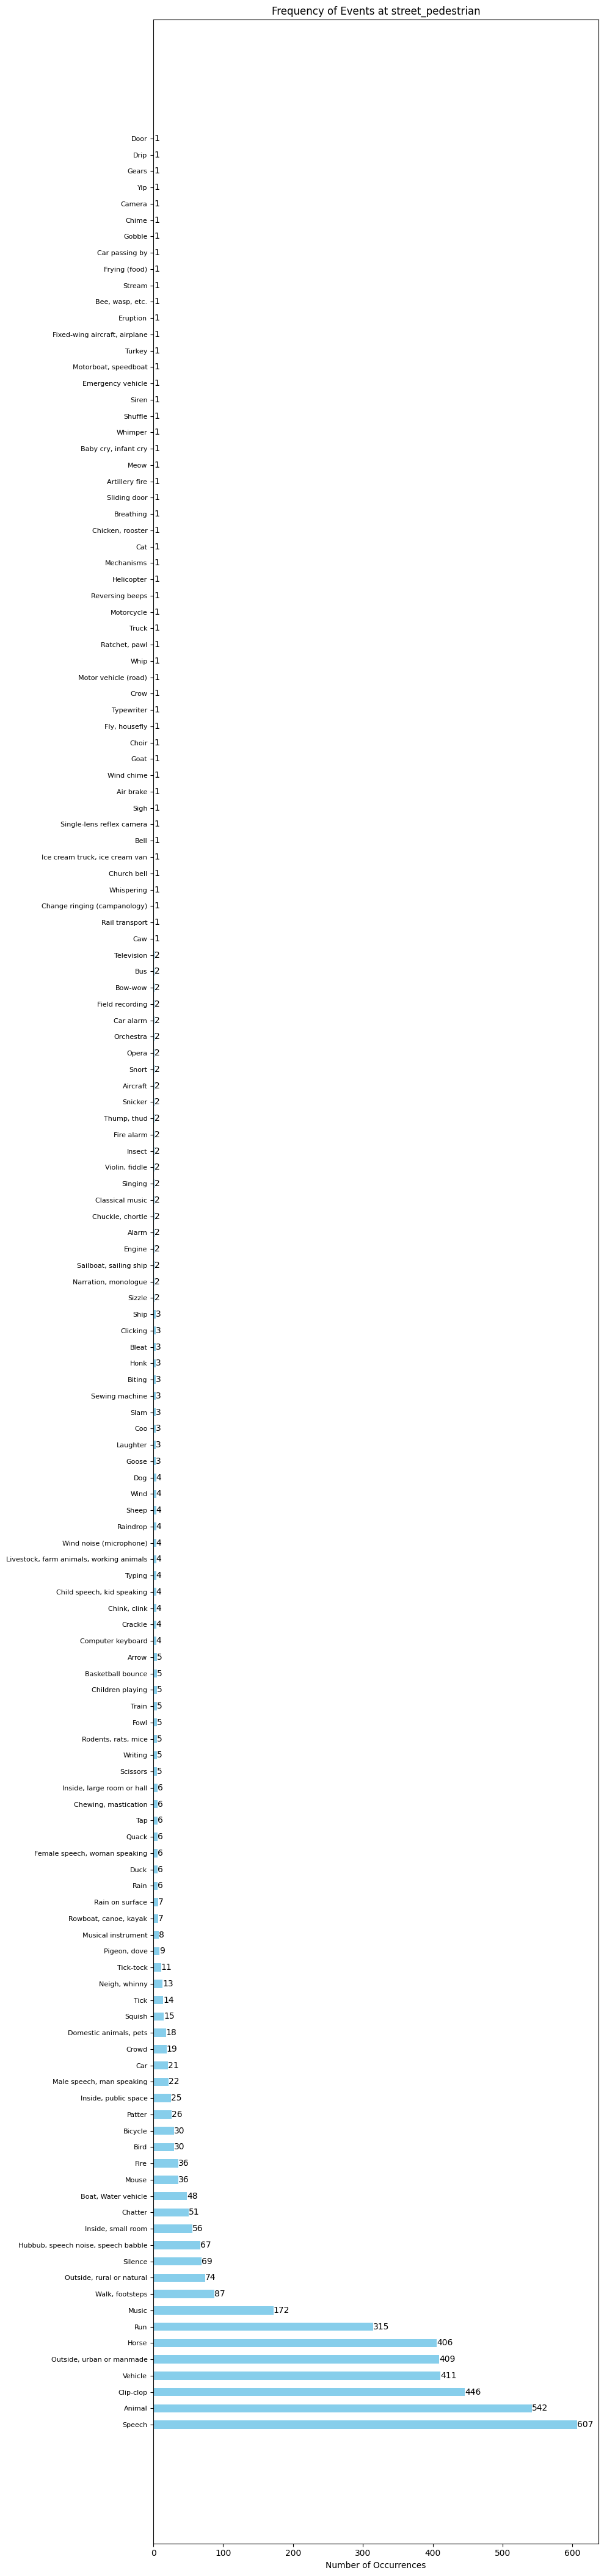

/tmp/ipykernel_50350/3466564818.py:3: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  corrected_event_col = data.select(pl.col('panns_inference_events_list').apply(safe_literal_eval).alias("events_label_list"))
/tmp/ipykernel_50350/3466564818.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  corrected_event_col = data.select(pl.col('panns_inference_events_list').apply(safe_literal_eval).alias("events_label_list"))
/tmp/ipykernel_50350/3466564818.py:6: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby("events_label_list")
/tmp/ipykernel_50350/3466564818.py:7: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias('count'))


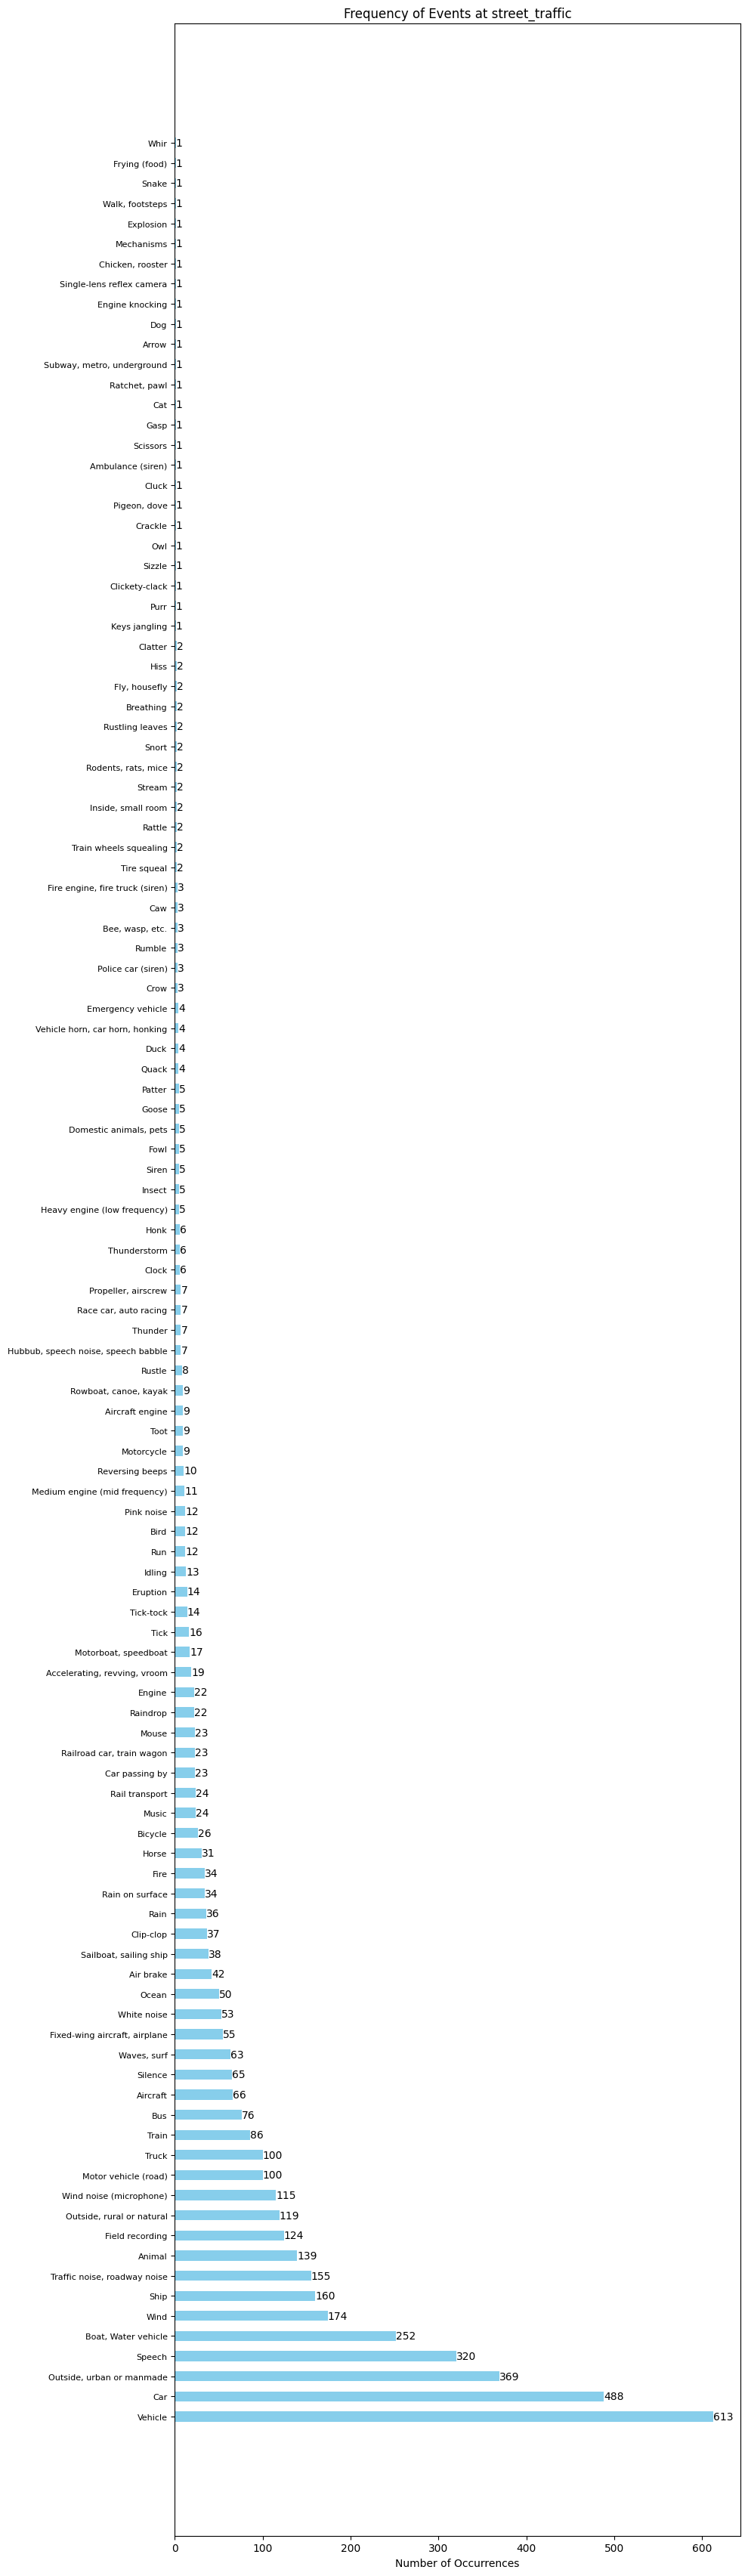

/tmp/ipykernel_50350/3466564818.py:3: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  corrected_event_col = data.select(pl.col('panns_inference_events_list').apply(safe_literal_eval).alias("events_label_list"))
/tmp/ipykernel_50350/3466564818.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  corrected_event_col = data.select(pl.col('panns_inference_events_list').apply(safe_literal_eval).alias("events_label_list"))
/tmp/ipykernel_50350/3466564818.py:6: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby("events_label_list")
/tmp/ipykernel_50350/3466564818.py:7: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias('count'))


In [ ]:
for name, data in tut18_data.group_by(['labels'], maintain_order=True):
    
    corrected_event_col = data.select(pl.col('panns_inference_events_list').apply(safe_literal_eval).alias("events_label_list"))
    corrected_event_col = corrected_event_col.select(pl.col("events_label_list").list.explode())
    event_counts = (corrected_event_col
                    .groupby("events_label_list")
                    .agg(pl.count().alias('count'))
                    .sort(by="count", descending=True))
    
    plot_event_counts(event_counts, name[0])